# CSCI E-25    
## Introduction to Machine Learning and Linear Models

### Steve Elston   

## Introduction to Linear Models 

The concept of the linear model is the basis of many statistical and machine learning models. Further, an understanding of linear models is a good basis for understand many other types of statistical and machine learning models.   

In this lesson we will focus on regression models, but the lessons drawn from this discussion can be applied to many other types of models. By developing an understanding of linear regression, you are building a foundation to understand many other machine learning models. Nearly all machine learning methods suffer from the same problems, including over-fitting and mathematically unstable fitting methods. Understanding these problems in the linear regression context will help you work with other machine learning models.     

The method of regression is one of the oldest and most widely used analytics methods. The goal of regression is to produce a model that represents the **best fit** to some observed data. Typically the model is a function describing some type of curve (lines, parabolas, etc.) that is determined by a set of parameters (e.g., slope and intercept). *Best fit* means that there is an optimal set of parameters which minimize an error criteria we choose.     

Many machine learning models, including some of the latest deep learning methods, are a form of regression. **Linear regression** is the foundational form of regression. Linear regression minimizes squared error of the predictions of the dependent variable using the values of the independent variables. This approach is know as the **method of least squares**.   

Regression models attempt to predict the value of one variable using the values of other variable. Unfortunately, the terminology used for these variables is not consistent across authors, statistical software packages, and application domains. The table below list some, but by no means all of the terms used for these variables. 

### Confusing terminology 

Given that linear models have been developed in many areas of a long period of times, different terminology has developed for the same things. For people trying to learn the subject this differing terminology is confusing and seemingly conflicting.    

The main division in terminology arises from different communities within statistics and machine learning. The table below shows some of the different terms commonly used in the two lineages:       

| Machine Learning Terminology | Statistical Terminology          |
|:---------------------------|:------------------------------|
| Regression vs classification   | Continuous numeric vs categorical response      |
| Learning algorithm or model    | Model                                |
| Features                       | Predictor, exogenous, or independent variables   |
| Training                       | Fitting                              |
| Trained model                  | Fitted model                         |
| Supervised learning            | Predictive modeling      

For the specific case of regression there are further differences in terminology. These arise not just between the statistical and machine learning communities. One difference in terminology is the naming of the variables used in regression and other machine learning models. The table below outlines some of these differences:          

Predicted Variable | Variables Used to Predict    
:----------------------- | :------------------------------     
 y | x   
 Dependent | Independent    
 Endogenous | Exogenous    
 Response | Predictor    
 Response | Explanatory    
 Label | Feature    
 Regressand | Regressors    
 Outcome | Design   
 Left Hand Side | Right Hand Side     
 

## Introduction to Theory of Linear Regression

We will focus on the theory of **linear models**, which are foundational. Key properties of linear models include:
- Derived with linear algebra.
- Include any model **linear in coefficients**, including polynomials, splines, Gaussian kernels and many other nonlinear function.    
- Understanding linear models is basis for understanding behavior many other statistical or machine learning models.
- Basis of many time series models.

### Linear model of a strait line

Let's have a look at the simple case of a regression model for a straight line. For this example we will work with single regression with one feature and one label. The data are in the form of some number of values pairs, $\{x_i,y_i \}$. 

The goal of this regression model is to find a straight that best fits the observed data. We can define the line by two coefficients or **parameters**, the **slope** and the **intercept**. A general representation of this parameterization of a straight line is illustrated in the figure below.

<img src="img/ymxb.jpg" alt="y_equals_mx_plus_b" style="width: 450px;"/>
<center>**Single regression model**</center>

Where,  

\begin{align}
m &= slope = \frac{rise}{run} = \frac{\delta y}{\delta x}\\
and\\
y &= b\ at\ x = 0
\end{align}


For each of the pairs of observed values, ${x_i,y_i}$, we can write the equation for the line with the errors as:

\begin{align}
y_i &= mx_i + b + \epsilon_i \\
where \\
\epsilon_i &= error
\end{align}

We can visualize these errors as shown in the figure below.

<img src="img/LSRegression.jpg" alt="LSRegression" style="width: 450px;"/>
<center>Example of least squares regression with errors shown as vertical lines</center>

We want to solve for $m$ and $b$ by minimizing the error, $\epsilon_i$. We call this **least squares regression** problem.

$$min \Sigma_i \epsilon^2 = min \Sigma_i{ (y_i - (mx_i + b))^2}$$

There are lots of computationally efficient algorithms for finding minimums of equations. 

## Linear regression assumptions

Now we should discuss a few key assumptions of linear regression. Keep these points in mind whenever you use these models. 

1. There is a **linear relationship** between dependent variable and the **coefficients** of the independent variables. This does not mean the function approximation used must be linear. Only that the model must be linear in the coefficients. 
2. Measurement error is independent and random. Technically, we say that the error is **independent identical distribution, or iid**.
3. Errors arise from the dependent variable only. Other models, such as complete regression, must be used if there are errors in the independent variable. 
The diagram below illustrates the iid errors for the dependent variable only.

![](img/IndependentErrors.jpg)

4. There is no **multicolinearity** between the features or independent variables. In other words, there is no significant correlation between the features.
5. The **residuals** are **homoscedastic** (constant variance).  In other words, the errors are the same across all values of the independent variables. We have explore this concept further.

## Load and Prepare MNIST image Data    

We will now work through an example of using a linear classifier for image classification. For this example we will use the [MNIST](https://en.wikipedia.org/wiki/MNIST_database) image data set. MNIST is a commonly used benchmark standard data set used for image classification research. The dataset is comprised of $28 \times 28$ images of hand written digits in the set $[0-9$. There are 60,000 training images and labels and 10,000 test images and labels.            

To get started, execute the code in the cell below to import the packages you will require for this example.  

In [1]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
import keras.utils.np_utils as ku
import sklearn.linear_model as sklm
import sklearn.metrics as metrics
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
import skimage.feature as feature

The MNIST dataset is built into Keras with the training and test subsets of images and labels returned in lists. Execute the code in the cell below to load these subsets. 

> **Note:** The MNIST data contain simple images of hand written digits. These images are properly cropped and have nearly binary light (digit) and dark (background region) areas. No significant adjustment or transformation of these images is required. 

In [2]:
(raw_train_images, train_labels), (raw_test_images, test_labels) = mnist.load_data()
print(raw_train_images.shape)

(60000, 28, 28)


> **Exercise 4-1:** It is useful to get a feeling for what this image data really looks like. On a $5 \times 5$ grid display the first 25 gray-scale training images. Give each image display a title with the label for that image or case. *Hint,* use a large display area.  

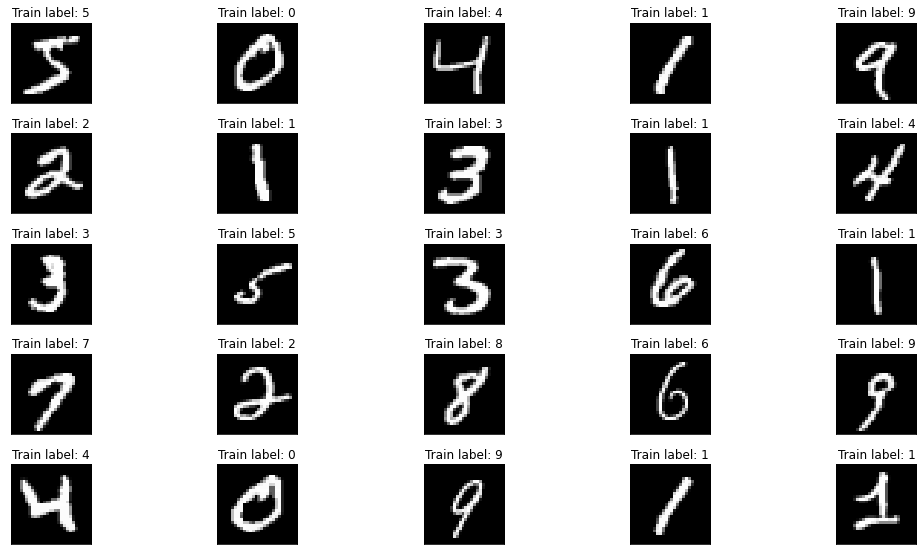

In [3]:
## Your code goes below
## Your code goes below
fig = plt.figure(figsize=(15,8))

k = 0
for t in range(25):
    k += 1
    plt.subplot(5,5,k)
    plt.tight_layout()
    plt.imshow(raw_train_images[t], cmap='gray', interpolation='none')
    plt.title("Train label: {}".format(train_labels[t]))
    plt.xticks([])
    plt.yticks([])

> Examine the images and the labels. What problems can you foresee when a machine learning algorithm attempts to learn to classify the digits shown in these images? Your answer need only be 1 to 3 well chosen sentences.             
> **End of exercise.**

> **Answer:**  Handwriting is not consistent; some letters can look similar to others. Consider 1 (bottom right) and the number 7.

In order to perform machine learning with image data you must transform the data to a structure with all the **features** for each image in one row of a **model matrix**. The linear model can then be written:      

$$X b = y$$

where:    
$X$ is the model matrix with the features values for each image in the rows.    
$b$ is the coefficient vector, with one coefficient per feature.   
$y$ is the vector of the **labels** which encode the categories of the objects in the images.    

For this example, we will use the values of the pixels as our feature values. This requires the 2-dimensional images be **flattened** into feature vectors. This concept is illustrated in the figure below.   

<img src="img/FlatteningImge.JPG" alt="Drawing" style="width:200px; height:100px"/>
<center>Flattening an image to a feature vector</center>

> **Exercise 4-2:** You will now flatten the the $28 \times 28$ images to feature vectors. Do the following:    
> 1. Print the shape of the training image array, noticing that each image is a 2-dimensional sub-array.   
> 2. Flatten the images to an array of 60,000 rows using [numpy.reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html). The image arrays are 8 bit integers. Convert them to floating point in the range $[0.0 - 1.0]$, which will normalize the feature values.    
> 3. Print the shape of the flattened image array.   
> 4. Apply the same transformations to the test image array and print the shape of the resulting array.  

In [4]:
## Your code goes below
raw_train_images.shape

(60000, 28, 28)

In [5]:
## Your code goes below for the test images
def prepare_data(image_array):
    img_shape = image_array.shape[1]
    resulting_array = image_array.reshape(-1,img_shape**2).astype(float)
    resulting_array /= resulting_array.max()
    print("Shape: {}".format(resulting_array.shape))
    return(resulting_array)

print("Training data")
train_images=prepare_data(raw_train_images)
print("------\nTesting data")
test_images=prepare_data(raw_test_images)

Training data
Shape: (60000, 784)
------
Testing data
Shape: (10000, 784)


> Examine the dimensions of the flattened arrays. How many features will your model have? Your answer should show a simple numeric calculation.    
> **End of exercise.**

> **Answer:** The features will have 787 features (28*28)

It can be instructive to look at the feature matrix. Execute the code in the cell below and examine the results.  

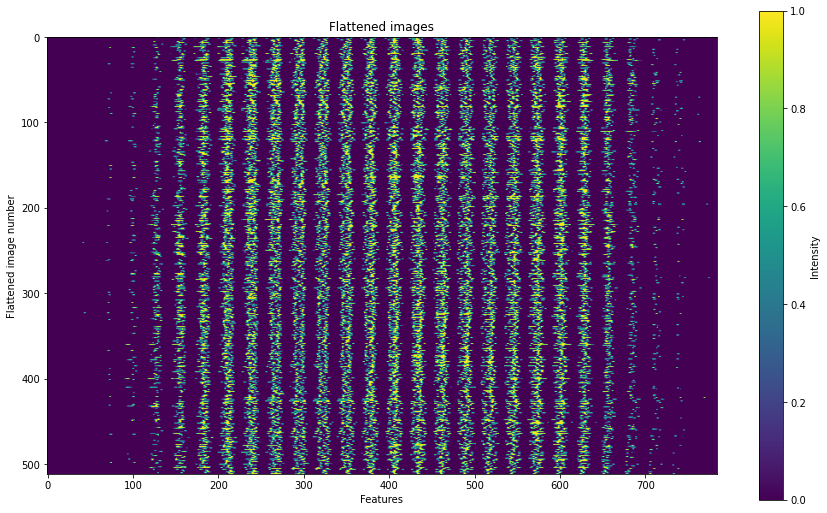

In [6]:
def plot_feature_sample(img, nrows=512):
    fig, ax = plt.subplots(figsize=(15,9))
    p = ax.imshow(img[:nrows,:])
    plt.ylabel('Flattened image number')
    plt.xlabel('Features')
    plt.title('Flattened images')
    cb = plt.colorbar(p)
    _=cb.set_label('Intensity')
    
plot_feature_sample(train_images)    

> **Exercise 4-3:** Examine the feature columns in the array displayed above. Notice the differing ranges of values in the features. What does this tell you about the differing information content of the features? In other words, which of these features might you expect to be predictive or not of the digit categories? Your answer need only be 1 to 3 well chosen sentences.           

> **Answer:** Speculation, but we could rely on certain images consistantly having higher intensity bands.

The significant number of uninformative features or pixel locations can lead to problems with model generalization. The coefficients computed for these uninformative features are unlikely to improve model performance. For example, consider that a bit of noise in some images presented to the classifier in production can lead to a high probability of erroneous classifications. 

There are a number of methods we could use to deal with the uninformative features, or pixel locations, in the image data. Transformation such as principle component analysis (PCA) can be effective in such situations. Here, we will take a more direct approach and filter features with close to zero variance. The code in the cell below does this by the following steps:  
1. A feature variance filter is trained using [sklearn-feature-selection-variancethreshold](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html#sklearn-feature-selection-variancethreshold). Notice that we fit on the training data alone, not the test data, to prevent information leakage. 
2. The transformation is applied independently to the training images and test images.  
3. A plot of the first 512 rows of the filtered training data is created and the resulting shape is printed. 

(60000, 784)
(60000, 328)


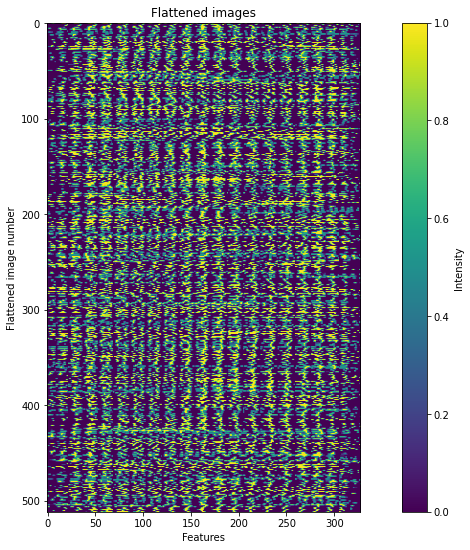

In [7]:
print(train_images.shape)
var_threshold = VarianceThreshold(0.05).fit(train_images)
train_images = var_threshold.transform(train_images)
test_images = var_threshold.transform(test_images)


plot_feature_sample(train_images)   
print(train_images.shape)

> **Exercise 4-4:** Compare the dimensionality and the information content of the filtered features to the original feature set. Does it appear that the information density of the remaining features is high compared to the original? Your answer need only be 1 to 3 well chosen sentences.              

> **Answer:** 

## A Linear Model        

With the feature arrays prepared, it is time to construct the machine learning model. The code in the cell below defines the linear **logistic regression** model object and fits it to the training data. Here we use the Scikit-Learn [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) function. The model definition has several key aspects:   
- L2 regularization with a hyperparameter $C = 1.0$.  
- Since there are 10 categories of digits, the multinomial probability distribution is used.    
- An efficient solver for the system of linear equations is selected.    

The `fit` method with the arguments of the model (feature) matrix and the label vector.  

If you are just learning to use Scikit-Learn it is useful to know that the general approach is used for all machine learning models available in the package. A model object is defined including the values of hyperparameters. A fit method is used to compute model parameters or weights. You can find a [Getting Started Guide](https://scikit-learn.org/stable/getting_started.html) in the Scikit-Learn documentation.   

Now, execute the code in the cell below to create a model object.  

In [8]:
LinearClassifier = sklm.LogisticRegression(penalty='l2', C=1.0, multi_class='multinomial', solver ='newton-cg').fit(train_images, train_labels)

> **Exercise 4-5:** The logistic regression model computes probabilities each of the categories for each case. You will now investigate an example by the following steps:    
> 1. Apply the `predict_proba` method with the test images to the trained classifier method. 
> 2. Display the first 10 rows of the resulting array of probabilities.    
> 3. Sum the probabilities in the array across the classes or cases. 

In [9]:
## Your code goes below

probabilities=LinearClassifier.predict_proba(test_images)
probabilities[0:10]

array([[6.07273627e-07, 3.54868793e-12, 6.41191525e-06, 2.40535645e-03,
        2.53617483e-07, 5.81136520e-06, 1.03293432e-11, 9.97395880e-01,
        8.73670534e-06, 1.76942478e-04],
       [4.50386589e-03, 1.22840023e-06, 9.66606643e-01, 3.58001837e-03,
        3.27363994e-12, 1.13983456e-02, 7.90217418e-03, 1.00495855e-17,
        6.00772470e-03, 3.27200622e-12],
       [1.05234645e-08, 9.80268434e-01, 1.29805948e-02, 1.49448132e-03,
        3.70957047e-05, 1.40556648e-03, 7.90212619e-04, 6.93554211e-04,
        2.10897694e-03, 2.21073268e-04],
       [9.99676017e-01, 3.45022729e-13, 7.78294345e-05, 6.04674127e-06,
        7.21110994e-09, 1.51236810e-04, 7.39352251e-05, 1.26368556e-06,
        8.48789549e-06, 5.17595518e-06],
       [2.88688390e-05, 1.71347494e-08, 2.06414561e-03, 1.54717618e-05,
        9.73631632e-01, 1.38582879e-04, 4.17253624e-04, 3.09285779e-03,
        9.44519024e-04, 1.96666510e-02],
       [1.39172381e-09, 9.94671608e-01, 1.57886601e-03, 6.88316586e-04,
   

In [10]:
print("Sum of the first probability: {}".format(probabilities[0].sum()))

Sum of the first probability: 0.9999999999999999


In [11]:
## Your code goes below to sum probabilities
print(probabilities.sum(axis=0))
print("\nThere are a total of 10,000 cases in the testing data set. According to the test results, \
there are {:.1f} cases".format(probabilities.sum(axis=0).sum()))

[ 994.58786553 1137.9855698  1004.51809118 1028.49652072  980.6041638
  900.34710061  957.37430582 1017.70985563  976.37850265 1001.99802425]

There are a total of 10,000 cases in the testing data set. According to the test results, there are 10000.0 cases


> Answer the following questions in 1 to 3 well chosen sentences:  
> 1. Examine the probabilities of the categories for each of the 10 cases. Is there generally a category with the highest probability? Are there cases where another cases has a reasonably high probability?   
> 2. Given your answers to the foregoing question, do you expect this classifier to make errors in identifying the categories?   
> 3. Are these proper probability distributions, in the sense that they sum to 1.0 for each case?  
> **End of exercise.**

> **Answers:**     
> 1.    Yes, 1 has a higher chance of classification, probably due to it's similarities with 7 and 9 (both lower). 
> 2.    Absolutely, we're not conducting any convolution of the image or extracting meaningful features (ie all the unique ways 1 or 7 can be written to distinguish them apart from eachother or 9). 
> 3.    Yes approximately; see code block 10. 

While it is useful to understand how the linear model algorithm computes probabilities for the categories of digits, for most applications we really only want to know the most probable category. The algorithm is quite simple; pick the category with the highest probability. Scikit-Learn provides the `predict` method that computes the probabilities are returns the category with the highest probability. Execute the code in the cell below to see an example.   

In [12]:
class_predictions = LinearClassifier.predict(test_images)
class_predictions[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=uint8)

## Evaluate the Model       

Now that you have a model and made predictions it is time to evaluate the model. The [Scikit-Learn metrics package](https://scikit-learn.org/stable/modules/model_evaluation.html) contains numerous functions for evaluating different types machine learning models. 

A widely used metric for evaluating classifiers; the number of correctly classified cases divided by all cases:   

$$Accuracy = \frac{TP+TN}{TP + FP + TN + FN}$$    

Where, $TP$ are the true positives, $FP$ are the false positives, $TN$ are true negative cases, and $FN$ are the false negatives.  

In this case we will focus on evaluation of the multi-class classifier. The [sklearn.metrics.accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) computes the accuracy given the actual labels and the predicted values. Execute the code in the cell below and examine the result.         

In [13]:
print(metrics.accuracy_score(test_labels, class_predictions))

0.9173


The overall accuracy of the model seems reasonably good. However, one must be extremely careful when evaluating any machine learning model. Any single metric can be quite misleading. It is good practice to look at several views of model performance.   

The **confusion matrix** can be a powerful tool for evaluating classifiers. The confusion matrix is a 2-dimensional array with the label values on vertical axis and the predicted values on the horizontal axis. The count of correctly classified cases for each category are along the diagonal. Counts or incorrectly classified cases are found off the diagonal. 

The confusion matrix can be computed and displayed numerically. For large numbers of categories a visualization of the confusion matrix can be useful. By studying the confusion matrix one can identify many problems which would not be apparent from one to two simple metrics. For example, accuracy of a classifier might seem quite high, but it could be misclassifying all members of some category, while doing well with other categories. Only by examination of the confusion matrix can such problems be discovered.     

The code in the cell does the following:  
1. Computes and displays the confusion matrix.   
2. Displays the log values of the confusion matrix. The logarithm is used in this case since the off-diagonal terms are quite small compared to the diagonal terms. A 1 is added to all terms to allow computation of the logarithm, adding a small but negligible bias.     

Execute the code and examine the results. 

[[ 950    0    3    2    1   13    5    3    3    0]
 [   0 1111    1    4    0    3    3    2   11    0]
 [   6   10  921   13    8    5   16   12   33    8]
 [   4    1   19  912    0   32    4   10   18   10]
 [   2    3    6    3  906    1   11    4    8   38]
 [   9    2    6   41    7  773   16    4   26    8]
 [  10    3    5    1   11   17  907    2    2    0]
 [   3    9   24    6    6    2    0  948    2   28]
 [   8   14    4   25    9   35   18    9  842   10]
 [   8    8    0    9   37    7    0   27   10  903]]


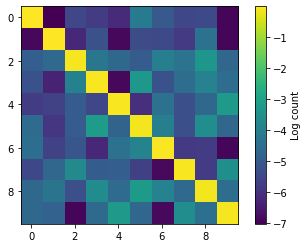

In [14]:
confusion_matrix = metrics.confusion_matrix(test_labels, class_predictions)   
print(confusion_matrix)
p = plt.imshow(np.log(np.divide(confusion_matrix + 1.0, np.sum(confusion_matrix, axis=1))))
cb = plt.colorbar(p)
_=cb.set_label('Log count')

Some other commonly used [performance metrics for classifiers](https://en.wikipedia.org/wiki/Precision_and_recall) are **Precision** and **Recall**:   

\begin{align}
Recall &= \frac{TP}{TP + FN}\\
Precision &=  \frac{TP}{TP + FP}
\end{align} 

You can think of recall as the fraction of positive cases correctly classified, also know as the **sensitivity** of the classifier. The precision or **positive predictive value** is the probability that a positive case can be correctly classified.  

> **Exercise 4-6:** The confusion matrix contains the information required to compute some key performance metrics of a classifier model. For example, the **true positive** (correctly classified) cases are along the diagonal. Being careful to differentiate the false positive and false negative cases in the confusion matrix, compute and print the accuracy, recall and precision. Use the functions [numpy.sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html), [numpy.diagonal](https://numpy.org/doc/stable/reference/generated/numpy.diagonal.html), [numpy.sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) for rows and columns of the confusion matrix. Keep in mind that the rows, less diagonal, are the false positives, and similarly for the false negatives. 

> **Note:** We are using an approximation by not weighting the cases by the total number.  

In [15]:
## Your code goes below

def compute_recall_precision(confusion):
    tps = np.diagonal(confusion)
    results={}
    for i,tp in enumerate(tps):
        i_result={}
        fn=np.sum(np.delete(confusion[:,i],i))
        fp=np.sum(np.delete(confusion[i,:],i))
        recall=tp/(tp+fn)
        precision=tp/(tp+fp)
        i_result["Recall"]=round(recall,4)
        i_result["Precision"]=round(precision,4)
        results[i]=i_result
    return(results)

compute_recall_precision(confusion_matrix)

{0: {'Recall': 0.95, 'Precision': 0.9694},
 1: {'Recall': 0.9569, 'Precision': 0.9789},
 2: {'Recall': 0.9312, 'Precision': 0.8924},
 3: {'Recall': 0.8976, 'Precision': 0.903},
 4: {'Recall': 0.9198, 'Precision': 0.9226},
 5: {'Recall': 0.8705, 'Precision': 0.8666},
 6: {'Recall': 0.9255, 'Precision': 0.9468},
 7: {'Recall': 0.9285, 'Precision': 0.9222},
 8: {'Recall': 0.8817, 'Precision': 0.8645},
 9: {'Recall': 0.8985, 'Precision': 0.8949}}

> What do these values of precision and recall tell you about the performance of the classifier model? Your answer need only be 1 to 3 well chosen sentences 
> **End of exercise.**

> **Answer:** The precision and recall of the mode, on average, is the same. Concentrating on the earlier example (1 and 0), the model tends to overclassify 1's and 0's (high precision, low recall).

There is another way to view the confusion matrix, category by category. In some cases, this representation can be easier to understand and work with. It can also be used to compute category specific metrics. To see an example of this representation, execute the code in the cell below which uses the [sklearn.metrics.multilabel_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.multilabel_confusion_matrix.html?highlight=multilabel_confusion_matrix) function.

In [16]:
confusion_matrix = metrics.multilabel_confusion_matrix(test_labels, ((class_predictions)))
print(confusion_matrix)

[[[8970   50]
  [  30  950]]

 [[8815   50]
  [  24 1111]]

 [[8900   68]
  [ 111  921]]

 [[8886  104]
  [  98  912]]

 [[8939   79]
  [  76  906]]

 [[8993  115]
  [ 119  773]]

 [[8969   73]
  [  51  907]]

 [[8899   73]
  [  80  948]]

 [[8913  113]
  [ 132  842]]

 [[8889  102]
  [ 106  903]]]


In the same way we can compute the class-specific precision and recall from the multi-class confusion matrix using [sklearn.metrics.precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) and [sklearn.metrics.recall_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score). 

In [17]:
unique_labels = np.unique(test_labels)
class_precision = metrics.precision_score(test_labels, class_predictions, unique_labels, average=None)
class_recall = metrics.recall_score(test_labels, class_predictions, unique_labels, average=None)

print('Class-specific precision')
print(class_precision)
print('\nClass-specific recall')
print(class_recall)

Class-specific precision
[0.95       0.95693368 0.93124368 0.8976378  0.91979695 0.8704955
 0.9255102  0.92850147 0.88167539 0.89850746]

Class-specific recall
[0.96938776 0.97885463 0.89244186 0.9029703  0.92260692 0.86659193
 0.94676409 0.92217899 0.86447639 0.89494549]


C:\Users\andre\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0 1 2 3 4 5 6 7 8 9] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


> **Exercise 4-7:** Examine the class specific precision and recall scores. Then compute and display the average precision and recall scores for the model by creating and executing code in the cell below. The number of cases in each of the 10 classes is the same, 1000. Therefore there is no need to weight the average when you compute it in this case.  

In [18]:
## Your code goes below
average_class_precision=np.mean(class_precision)
average_class_recall=np.mean(class_recall)
print("Average class precision:{:.3f}\nAverage class recall:{:.3f}".format(average_class_precision,average_class_recall))

Average class precision:0.916
Average class recall:0.916


> Answer the following questions in 1 to 3 well chosen sentences:  
> 1. What does the variation in the precision and recall scores of the different digit classes tell you about the performance of the classifier?   
> 2. Average precision and recall scores are often used to summarize the performance of multi-class classifiers. In this case, do you think the summary is reasonable, or does it loose too much information? 
> **End of exercise.**

> **Answers:**
> 1.   The average recall and precision are equal; the model is able to correctly identify relevant cases and classify them at the same rate.
> 2.   Computing a weighted F1 score would really help evaluate the model's performance because the average precision and recall are equal. A weight would be developed such that either performance or recall would be a more important key metric.

> **Exercise 4-8:** To better understand the source of errors from the classifier model it is useful to examine some details of the erroneously classified cases. You will now do the following:    
> 1. Create an index vector of the erroneously cases.     
> 2. Print the prediction probability vectors for the first 10 incorrectly classified cases.   
> 3. Create a a $5 \times 5$ grid display the first 25 gray-scale erroneously classified images. Give each image display a title with the label for that image and the predicted class. *Hint,* use a large display area.  

In [19]:
## Your code goes below
def get_bad_predictions(predictions, labels):
    res=[]
    for i,prediction in enumerate(predictions):
        if prediction!=labels[i]:
            res.append([i,prediction,labels[i]])
    return(res)
bad_predictions=get_bad_predictions(class_predictions,test_labels)

print("Index, Prediction, Label:")
bad_predictions[:10]

Index, Prediction, Label:


[[8, 6, 5],
 [33, 6, 4],
 [62, 4, 9],
 [63, 2, 3],
 [66, 2, 6],
 [92, 4, 9],
 [124, 4, 7],
 [149, 9, 2],
 [193, 3, 9],
 [195, 5, 3]]

In [20]:
prediction_probabilities=LinearClassifier.predict_proba(test_images)
for i, details in enumerate(bad_predictions):
    print("----------\nPrediction: {}, Label:{}".format(details[1],details[2]))
    print("Prediction probabilities:\n{}".format(prediction_probabilities[i]))
    if i>=10:
        break

----------
Prediction: 6, Label:5
Prediction probabilities:
[6.07273627e-07 3.54868793e-12 6.41191525e-06 2.40535645e-03
 2.53617483e-07 5.81136520e-06 1.03293432e-11 9.97395880e-01
 8.73670534e-06 1.76942478e-04]
----------
Prediction: 6, Label:4
Prediction probabilities:
[4.50386589e-03 1.22840023e-06 9.66606643e-01 3.58001837e-03
 3.27363994e-12 1.13983456e-02 7.90217418e-03 1.00495855e-17
 6.00772470e-03 3.27200622e-12]
----------
Prediction: 4, Label:9
Prediction probabilities:
[1.05234645e-08 9.80268434e-01 1.29805948e-02 1.49448132e-03
 3.70957047e-05 1.40556648e-03 7.90212619e-04 6.93554211e-04
 2.10897694e-03 2.21073268e-04]
----------
Prediction: 2, Label:3
Prediction probabilities:
[9.99676017e-01 3.45022729e-13 7.78294345e-05 6.04674127e-06
 7.21110994e-09 1.51236810e-04 7.39352251e-05 1.26368556e-06
 8.48789549e-06 5.17595518e-06]
----------
Prediction: 2, Label:6
Prediction probabilities:
[2.88688390e-05 1.71347494e-08 2.06414561e-03 1.54717618e-05
 9.73631632e-01 1.38582

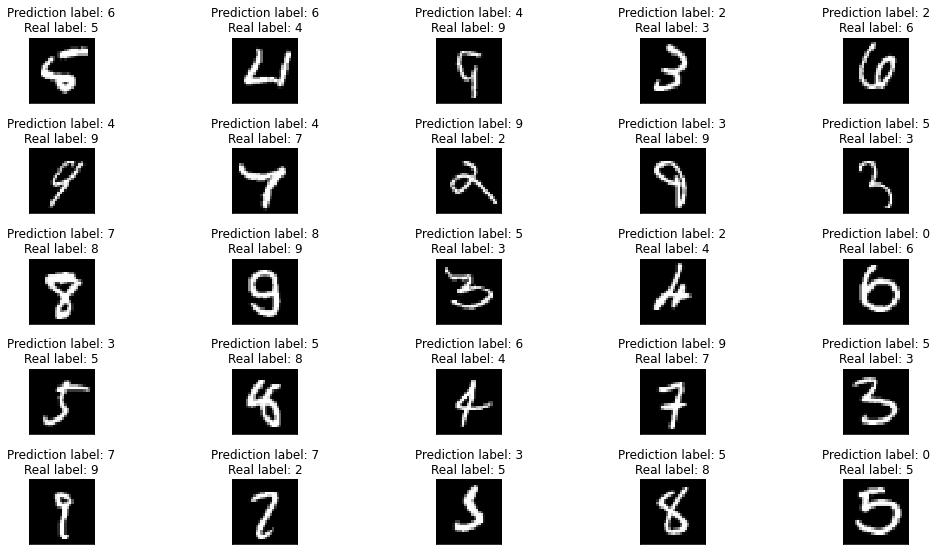

In [21]:
## Your code goes below to display the images with predicted and label values

fig = plt.figure(figsize=(15,8))

k = 0
for t in range(25):
    k += 1
    img_index=bad_predictions[t][0]
    plt.subplot(5,5,k)
    plt.tight_layout()
    plt.imshow(raw_test_images[img_index], cmap='gray', interpolation='none')
    plt.title("Prediction label: {}\nReal label: {}".format(bad_predictions[t][1],bad_predictions[t][2]))
    plt.xticks([])
    plt.yticks([])

> Answer the following questions in 1 to 3 well chosen sentences:    
> 1. Examine the probability vectors for the 10 erroneous cases. What observation can you make about these probabilities that help explain the errors in these cases?   
> 2. Examine the misclassified images, the label and prediction. What observation can you make about the sources of errors in these cases?  
> **End of exercise.**     

> **Answers:**   
> 1.  There aren't any discernable patterns with the probability cases, and the classes seem to be out of order too. 
> 2.  The models strugguled to classify these numbers because they were very similar to the misclassifications; the 9 (1st column, 2nd row) is not connected, and looks like a 4. The 4 on the 2nd column, first row does not look like a number at all!